In [237]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn import metrics

In [238]:
house_data = pd.read_csv('kc_house_data.csv')
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [239]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Text(0.5, 1.0, 'Correlation Heatmap')

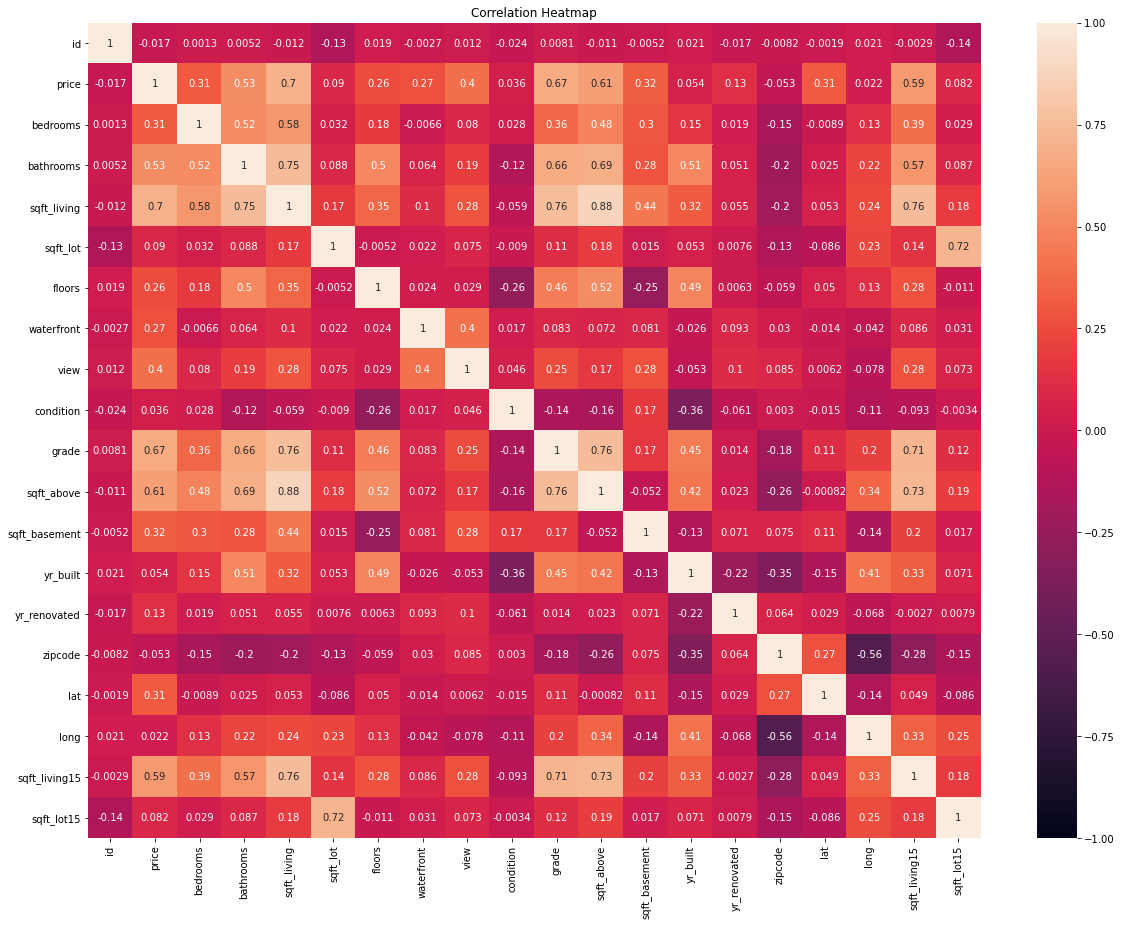

In [240]:
# Determining the corrolation between features.

plt.subplots(figsize=(20,15))

sns.heatmap(house_data.corr() , vmin=-1 , vmax=1,annot=True).set_title('Correlation Heatmap')



# Linear Regression Model

The corrolation  between 'price'  and  'sqft_living' = 0.7  --> we will use 'sqft_living' to  predict 'price'.

In [322]:
# extract feature  and target from our dataset

x= house_data[['sqft_living']] 
y =house_data['price'] 


In [323]:
#splitting data with test size of 25%
x_train, x_test, y_train , y_test =train_test_split(x, y,random_state=5  ) 

In [324]:
(x_train.shape,y_test.shape )

((16209, 1), (5404,))

In [325]:

MSE_list=[]
R_squared_list=[]
model_list =['Linear Regression','Multi-linear Regression', 'Polynomial Regression']


In [326]:
#Linear regression model 
reg_model = LinearRegression()

# Fitting the traning data 
reg_model.fit(x_train,y_train )

LinearRegression()

In [327]:
# testing  model's performance  in  three different ways
reg_model.score(x_test,y_test) 

0.5020612063135523

In [328]:
# Mean squared error regression loss.
MSE_list.append(mean_squared_error(y_test, reg_model.predict(x_test)))
mean_squared_error(y_test, reg_model.predict(x_test))


66113336612.12616

In [329]:
# coefficient of determination regression score function.
R_squared_list.append(r2_score(y_test,reg_model.predict(x_test) ))
r2_score(y_test,reg_model.predict(x_test) )

0.5020612063135523

 'sqft_living'  is not a significant feature for the prediction of price. Hence,We will try to  fit the model including a few other features  and stop at a model which gives us the maximum R-squared value.


# Multi-Linear Regression Model


The corrolation between:   

    'sqft_living' and 'price ' = 0.7

    'grade' and 'price' = 0.67, 
                        
    'sqft_above'  and 'price' =  0.61,
  
    'bathrooms' and  'price' = 0.53 , 
             
    'view' and 'price' = 0.40, 
        
    'lat ' and 'price'= 0.31.
                       

--> we will use this 6 features for our multi_linear regression model


In [330]:
# Multi-linear regression model 

x= house_data[['sqft_living','bathrooms', 'view','grade','sqft_above','lat']]
y =house_data['price'] 
x.head()

,sqft_living,bathrooms,view,grade,sqft_above,lat
0,1180,1.00,0,7,1180,47.5112
1,2570,2.25,0,7,2170,47.7210
2,770,1.00,0,6,770,47.7379
3,1960,3.00,0,7,1050,47.5208
4,1680,2.00,0,8,1680,47.6168


In [331]:
#splitting data with test size of 25%
x_train, x_test, y_train , y_test =train_test_split(x, y,random_state=5  ) 

In [332]:
(x_train.shape,y_test.shape )

((16209, 6), (5404,))

In [333]:
#Linear regression model 
ML_model = LinearRegression()

# Fitting the traning data 
ML_model.fit(x_train,y_train )

LinearRegression()

In [334]:
# testing  model's performance  in  three different ways
ML_model.score(x_test,y_test) 

0.6461667024208599

In [335]:
# Mean squared error regression loss.
MSE_list.append(mean_squared_error(y_test, ML_model.predict(x_test)))
mean_squared_error(y_test, ML_model.predict(x_test))


46979870225.092255

In [336]:
# coefficient of determination regression score function.
R_squared_list.append(r2_score(y_test,ML_model.predict(x_test) ))
r2_score(y_test,ML_model.predict(x_test) )


0.6461667024208599

Multi linear model is better than linear model  in terms of R squared.

--> Adding more variables to the multiple regression improves the fit.

# Polynomial Regression

In [337]:

# Estimator
poly_model = LinearRegression() 

# Transformer
transformer = PolynomialFeatures(degree=2)
x_train_transformer =poly.fit_transform(x_train)

poly_model.fit(x_train_transformer,y_train)


LinearRegression()

In [338]:
# Testing  model's performance

x_test_transformer = poly.transform(x_test)
poly_model.score(x_test_transformer,y_test) 



0.7174905290106659

In [339]:
MSE_list.append(mean_squared_error(y_test, poly_model.predict(x_test_transformer)))
mean_squared_error(y_test, poly_model.predict(x_test_transformer))

37509918866.43976

In [340]:
R_squared_list.append(r2_score(y_test, poly_model.predict(x_test_transformer)))
r2_score(y_test, poly_model.predict(x_test_transformer))

0.7174905290106659

In [341]:
MSE_list

[66113336612.12616, 46979870225.092255, 37509918866.43976]

In [343]:
R_squared_list

[0.5020612063135523, 0.6461667024208599, 0.7174905290106659]

Text(0.5, 1.0, "model's performance using R squared method ")

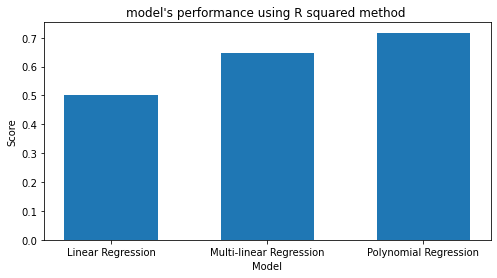

In [344]:
plt.subplots(figsize=(8,4))
 
plt.bar(model_list, R_squared_list, width=0.6)
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('model\'s performance using R squared method ')

Text(0.5, 1.0, 'Mean squared logarithmic error regression loss.')

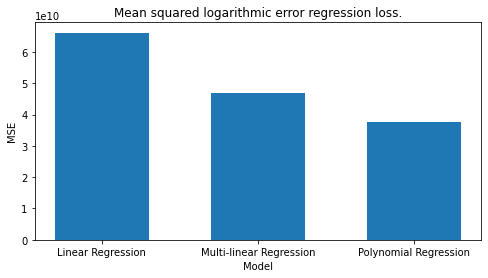

In [345]:
plt.subplots(figsize=(8,4))
 
plt.bar(model_list,MSE_list, width=0.6)
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('Mean squared logarithmic error regression loss.')



Polynomial model  is better than linear  and multi linear model  because it's R squared is higher and it's MSE  is lower.

-->using PolynomialFeatures  improves the quality of our data before it goes through the machine.